In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [ ]:
# Завантажуємо датасет California Housing
data = fetch_california_housing()

# Перетворюємо на DataFrame для зручності
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Розділяємо дані на фічі та цільову змінну
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Розділяємо дані на тренувальну (80%) і тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Створюємо та тренуємо базову лінійну регресійну модель
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Прогнозуємо на тренувальних і тестових даних
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Оцінюємо модель
print("Лінійна регресія (базова модель):")
print(f"Тренувальний MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Тестовий MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Тренувальний R²: {r2_score(y_train, y_train_pred)}")
print(f"Тестовий R²: {r2_score(y_test, y_test_pred)}")

Лінійна регресія (базова модель):
Тренувальний MSE: 0.5179331255246699
Тестовий MSE: 0.5558915986952444
Тренувальний R²: 0.6125511913966952
Тестовий R²: 0.5757877060324508


In [ ]:
# Ridge (L2 регуляризація)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

print("\nRidge Regression:")
print(f"Тренувальний MSE: {mean_squared_error(y_train, y_train_pred_ridge)}")
print(f"Тестовий MSE: {mean_squared_error(y_test, y_test_pred_ridge)}")
print(f"Тренувальний R²: {r2_score(y_train, y_train_pred_ridge)}")
print(f"Тестовий R²: {r2_score(y_test, y_test_pred_ridge)}")


Ridge Regression:
Тренувальний MSE: 0.5179332149226819
Тестовий MSE: 0.5558034669932211
Тренувальний R²: 0.6125511245209703
Тестовий R²: 0.5758549611440126


In [ ]:
# Lasso (L1 регуляризація)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)

print("\nLasso Regression:")
print(f"Тренувальний MSE: {mean_squared_error(y_train, y_train_pred_lasso)}")
print(f"Тестовий MSE: {mean_squared_error(y_test, y_test_pred_lasso)}")
print(f"Тренувальний R²: {r2_score(y_train, y_train_pred_lasso)}")
print(f"Тестовий R²: {r2_score(y_test, y_test_pred_lasso)}")


Lasso Regression:
Тренувальний MSE: 0.60300014172392
Тестовий MSE: 0.6135115198058131
Тренувальний R²: 0.5489153425707493
Тестовий R²: 0.5318167610318159


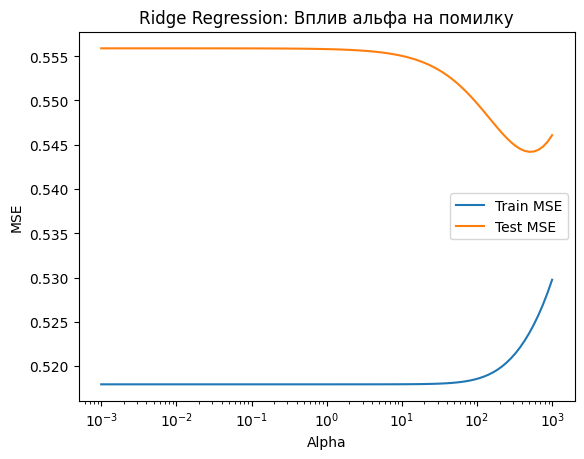

In [ ]:
# Досліджуємо вплив параметра альфа в Ridge
alphas = np.logspace(-3, 3, 100)
ridge_train_mse = []
ridge_test_mse = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_train_mse.append(mean_squared_error(y_train, ridge_reg.predict(X_train)))
    ridge_test_mse.append(mean_squared_error(y_test, ridge_reg.predict(X_test)))

plt.plot(alphas, ridge_train_mse, label='Train MSE')
plt.plot(alphas, ridge_test_mse, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression: Вплив альфа на помилку')
plt.legend()
plt.show()

ВИСНОВОК
Під час виконання завдання було побудовано базову лінійну регресійну модель та оцінено її на тренувальних і тестових даних. Аналіз результатів показав наявність перенавчання, що було виправлено за допомогою регуляризації (Ridge і Lasso).